# Steam Stats Exploratory Data Analysis

This notebook contains the exploratory data analysis of Steam game statistics dataset.

## Table of Contents
1. [Data Loading](#data-loading)
2. [Data Overview](#data-overview)
3. [Data Cleaning](#data-cleaning)
4. [Exploratory Analysis](#exploratory-analysis)
5. [Visualizations](#visualizations)
6. [Key Findings](#key-findings)

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'plotly_mimetype'

# Configure plotting
#plt.style.use('seaborn-v0_8')
#sns.set_palette("husl")
#%matplotlib inline

## Data loading

In [264]:
df = pd.read_csv('../data/raw/games_march2025_full.csv')

# Display basic information
df.head()

,appid,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,discount,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,...,879,5174,350,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,8632939,82,96473
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,...,0,0,0,0,616738,"{'Survival': 14838, 'Shooter': 12727, 'Battle ...",59,2513842,68,16720
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,...,1536,898,892,0,555977,"{'Free to Play': 59933, 'MOBA': 20158, 'Multip...",81,2452595,80,29366
3,271590,Grand Theft Auto V Legacy,2015-04-13,17,0.00,0,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,...,771,7101,74,0,117698,"{'Open World': 32644, 'Action': 23539, 'Multip...",87,1803832,92,17517
4,488824,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,...,0,0,0,0,0,"{'FPS': 8082, 'Multiplayer': 6139, 'Tactical':...",84,1168404,76,13017


In [265]:
print(f"Datashape: {df.shape}")

Datashape: (94948, 47)


## Data Overview

In [266]:
# Basic dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94948 entries, 0 to 94947
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   appid                     94948 non-null  int64  
 1   name                      94946 non-null  object 
 2   release_date              94948 non-null  object 
 3   required_age              94948 non-null  int64  
 4   price                     94948 non-null  float64
 5   dlc_count                 94948 non-null  int64  
 6   detailed_description      89522 non-null  object 
 7   about_the_game            89499 non-null  object 
 8   short_description         89599 non-null  object 
 9   reviews                   10428 non-null  object 
 10  header_image              94948 non-null  object 
 11  website                   41194 non-null  object 
 12  support_url               44185 non-null  object 
 13  support_email             78848 non-null  object 
 14  window

In [267]:
df.columns

Index(['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'detailed_description', 'about_the_game', 'short_description',
       'reviews', 'header_image', 'website', 'support_url', 'support_email',
       'windows', 'mac', 'linux', 'metacritic_score', 'metacritic_url',
       'achievements', 'recommendations', 'notes', 'supported_languages',
       'full_audio_languages', 'packages', 'developers', 'publishers',
       'categories', 'genres', 'screenshots', 'movies', 'user_score',
       'score_rank', 'positive', 'negative', 'estimated_owners',
       'average_playtime_forever', 'average_playtime_2weeks',
       'median_playtime_forever', 'median_playtime_2weeks', 'discount',
       'peak_ccu', 'tags', 'pct_pos_total', 'num_reviews_total',
       'pct_pos_recent', 'num_reviews_recent'],
      dtype='object')

In [268]:
# Check for missing values
print("Missing Values:")
missing_data = df.isnull().sum()
missing_data[missing_data > 0].sort_values(ascending=False)

Missing Values:


score_rank              94909
metacritic_url          91372
reviews                 84520
notes                   78296
website                 53754
support_url             50763
support_email           16100
about_the_game           5449
detailed_description     5426
short_description        5349
name                        2
dtype: int64

## Data Cleaning

Clean and preprocess the data for analysis.

In [269]:
columns_to_delete = [
    'detailed_description',
    'about_the_game',
    'reviews',
    'website',
    'short_description',
    'support_email',
    'support_url',
    'screenshots',
    'movies',
    'notes',
    'num_reviews_total',
    'num_reviews_recent',
    'average_playtime_forever',    
    'average_playtime_2weeks',    
    'median_playtime_forever',   
    'median_playtime_2weeks',
    'packages',
    'metacritic_url',
    'achievements',
]

df = df.drop(columns_to_delete, axis=1)
df = df.drop('score_rank', axis=1)
df = df.drop_duplicates(subset='name', keep='last')

In [270]:
df.columns

Index(['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'header_image', 'windows', 'mac', 'linux', 'metacritic_score',
       'recommendations', 'supported_languages', 'full_audio_languages',
       'developers', 'publishers', 'categories', 'genres', 'user_score',
       'positive', 'negative', 'estimated_owners', 'discount', 'peak_ccu',
       'tags', 'pct_pos_total', 'pct_pos_recent'],
      dtype='object')

In [271]:
df.head(1)

,appid,name,release_date,required_age,price,dlc_count,header_image,windows,mac,linux,...,genres,user_score,positive,negative,estimated_owners,discount,peak_ccu,tags,pct_pos_total,pct_pos_recent
0,730,Counter-Strike 2,2012-08-21,0,0.0,1,https://shared.akamai.steamstatic.com/store_it...,True,False,True,...,"['Action', 'Free To Play']",0,7480813,1135108,100000000 - 200000000,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,82


## Análise Exploratória

In [272]:
# TODO: Add specific analysis based on your dataset columns
# Examples:
# - Game price analysis
# - Genre popularity
# - Release date trends
# - Rating analysis
# - Platform analysis

* Most expansive game

In [273]:
max_price = df['price'].max()
df[df['price'] == max_price]

,appid,name,release_date,required_age,price,dlc_count,header_image,windows,mac,linux,...,genres,user_score,positive,negative,estimated_owners,discount,peak_ccu,tags,pct_pos_total,pct_pos_recent
64185,2504210,The Leverage Game Business Edition,2023-08-26,0,999.98,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,"['Indie', 'Simulation']",0,0,0,0 - 20000,0,0,[],-1,-1
86496,2499620,The Leverage Game,2023-08-25,0,999.98,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,"['Indie', 'Simulation']",0,1,0,0 - 20000,0,0,"{'Board Game': 47, 'Turn-Based Tactics': 42, '...",-1,-1


* Cheaper games (no free)

In [274]:
min_price = df.query('price != 0')['price'].min()
df[df['price'] == min_price]

,appid,name,release_date,required_age,price,dlc_count,header_image,windows,mac,linux,...,genres,user_score,positive,negative,estimated_owners,discount,peak_ccu,tags,pct_pos_total,pct_pos_recent
927,434570,Blood and Bacon,2016-02-01,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,"['Action', 'Adventure', 'Casual']",0,32256,1614,1000000 - 2000000,51,74,"{'Gore': 301, 'Funny': 258, 'Multiplayer': 236...",95,95
1564,2181930,DR LIVESEY ROM AND DEATH EDITION,2023-02-13,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,"['Action', 'Adventure', 'Indie', 'RPG', 'Simul...",0,12529,712,500000 - 1000000,51,7,"{'Action': 405, 'Cartoon': 395, 'Rogue-like': ...",95,87
1947,1293230,House of Detention,2020-05-29,0,0.49,1,https://shared.akamai.steamstatic.com/store_it...,True,True,True,...,"['Action', 'Adventure', 'Indie', 'Massively Mu...",0,7930,697,200000 - 500000,51,4,"{'Dark Fantasy': 123, 'Psychological Horror': ...",91,89
2389,1271710,LEWDAPOCALYPSE Hentai Evil,2020-04-30,0,0.49,2,https://shared.akamai.steamstatic.com/store_it...,True,True,True,...,"['Action', 'Adventure', 'Casual', 'Indie']",0,0,0,0 - 20000,51,11,[],94,86
2543,1184160,RUSSIAPHOBIA,2020-12-25,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,True,True,...,"['Action', 'Adventure', 'Casual', 'Indie', 'Ma...",0,4921,2239,200000 - 500000,51,7,"{'Action-Adventure': 322, 'Idler': 318, 'Polit...",69,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93874,2295580,Police Car Armored: Cop Simulator,2023-02-14,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,"['Action', 'Indie', 'Racing', 'RPG', 'Simulati...",0,3,1,0 - 20000,0,0,"{'Action': 71, 'Racing': 65, 'RPG': 62, 'Simul...",-1,-1
94008,2305940,Offroad Jeep 4x4: Car Driving Simulator,2023-02-22,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,"['Action', 'Indie', 'Racing', 'Simulation', 'S...",0,3,2,0 - 20000,0,0,"{'Action': 180, 'Racing': 174, 'Simulation': 1...",-1,-1
94074,2478500,City Car Parking Simulator,2023-07-11,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,"['Action', 'Indie', 'Racing', 'Simulation']",0,3,2,0 - 20000,51,1,"{'Action': 181, 'Racing': 174, 'Simulation': 1...",-1,-1
94481,2557640,Ronshade,2023-08-31,0,0.49,0,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,"['Indie', 'Strategy']",0,2,0,0 - 20000,51,0,"{'Hack and Slash': 49, 'Turn-Based Combat': 43...",-1,-1


* Average game prices

In [275]:
print(f'${df['price'].mean().round(2)} USD')

$6.92 USD


* Greatest peak concurrent user game

In [276]:
max_peak_ccu = df['peak_ccu'].max()
df[df['peak_ccu'] == max_peak_ccu]

,appid,name,release_date,required_age,price,dlc_count,header_image,windows,mac,linux,...,genres,user_score,positive,negative,estimated_owners,discount,peak_ccu,tags,pct_pos_total,pct_pos_recent
0,730,Counter-Strike 2,2012-08-21,0,0.0,1,https://shared.akamai.steamstatic.com/store_it...,True,False,True,...,"['Action', 'Free To Play']",0,7480813,1135108,100000000 - 200000000,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,82


In [277]:
print(f'Counter Strike 2 peak concurrent user: {df[df['name'] == 'Counter-Strike 2']['peak_ccu'].item()}')

Counter Strike 2 peak concurrent user: 1212356


* Support by OS

In [278]:
supported_OS = df[['windows', 'mac', 'linux']].sum()

df_os = pd.DataFrame({
    'OS': supported_OS.index,
    'Quantity': supported_OS.values
})

C:\Users\leona\AppData\Local\Temp\ipykernel_20520\3826848814.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




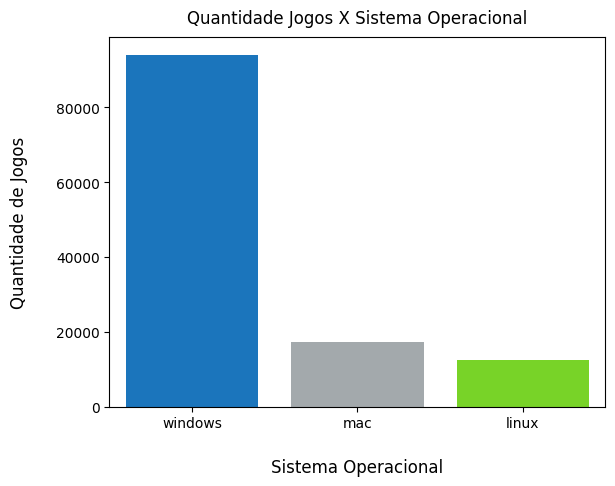

In [279]:
sns.barplot(data=df_os, x='OS', y='Quantity', palette=[
    '#0078D7', '#A2AAAD', '#76F00B'
])
plt.title('Quantidade Jogos X Sistema Operacional', pad=10)
plt.ylabel('Quantidade de Jogos', labelpad=20, fontsize=12)
plt.xlabel('Sistema Operacional', labelpad=20, fontsize=12)
plt.show()

In [280]:
df['genres'].value_counts()

genres
[]                                                                                                                  5422
['Casual', 'Indie']                                                                                                 5062
['Action', 'Indie']                                                                                                 4671
['Action', 'Adventure', 'Indie']                                                                                    4071
['Adventure', 'Indie']                                                                                              3373
                                                                                                                    ... 
['Indie', 'Utilities', 'Video Production']                                                                             1
['Violent', 'Adventure', 'Indie', 'Early Access']                                                                      1
['Audio Production', 'Pho

In [281]:
type(df['genres'].iloc[0])

str

In [282]:
df['genres'] = df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
#df['genres'] = df['genres'].str.strip("[]").str.replace("'", "").str.split(", ")


In [283]:
df_exploded_text = df.explode('genres')
df_genres = df_exploded_text['genres'].value_counts().head(10).reset_index()
df_genres

,genres,count
0,Indie,62684
1,Casual,38440
2,Action,36576
3,Adventure,35156
4,Simulation,18474
5,Strategy,17266
6,RPG,16242
7,Early Access,9045
8,Free To Play,8739
9,Sports,3930


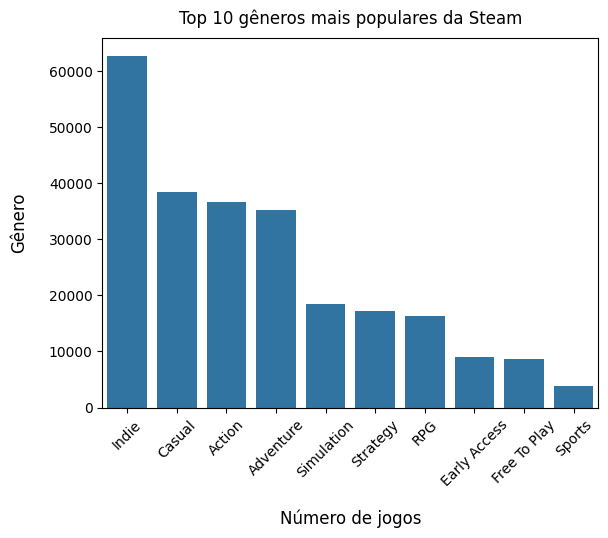

In [284]:
sns.barplot(data=df_genres, x='genres', y='count')
#plt.figure(figsize=(15, 10))
plt.title('Top 10 gêneros mais populares da Steam', size=12, pad=10)
plt.xlabel('Número de jogos', size=12, labelpad=15)
plt.ylabel('Gênero', size=12, labelpad=15)
plt.xticks(rotation=45)
plt.show()


In [285]:
type(df['tags'].iloc[0])

str

In [286]:
df['tags'].iloc[0]

"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer': 62332, 'Competitive': 53359, 'Action': 47512, 'Team-Based': 46430, 'e-sports': 43533, 'Tactical': 41354, 'First-Person': 39414, 'PvP': 34470, 'Online Co-Op': 33966, 'Co-op': 30263, 'Strategy': 30111, 'Military': 28699, 'War': 28006, 'Difficult': 25966, 'Trading': 25717, 'Realistic': 25430, 'Fast-Paced': 25318, 'Moddable': 6603}"

In [287]:
df.columns

Index(['appid', 'name', 'release_date', 'required_age', 'price', 'dlc_count',
       'header_image', 'windows', 'mac', 'linux', 'metacritic_score',
       'recommendations', 'supported_languages', 'full_audio_languages',
       'developers', 'publishers', 'categories', 'genres', 'user_score',
       'positive', 'negative', 'estimated_owners', 'discount', 'peak_ccu',
       'tags', 'pct_pos_total', 'pct_pos_recent'],
      dtype='object')

In [288]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [289]:
df['supported_languages'].value_counts()

supported_languages
['English']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [290]:
type(df['supported_languages'].iloc[0])

str

In [291]:
df['supported_languages'] = df['supported_languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded_text = df.explode('supported_languages')

In [292]:
df_text_languages = df_exploded_text['supported_languages'].value_counts().head(10).reset_index()
df_text_languages

,supported_languages,count
0,English,84951
1,Simplified Chinese,24577
2,German,22297
3,French,22002
4,Japanese,20961
5,Russian,20617
6,Spanish - Spain,20553
7,Italian,15291
8,Korean,13688
9,Traditional Chinese,12690


In [293]:
df['full_audio_languages'] = df['full_audio_languages'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)
df_exploded_audio = df.explode('full_audio_languages')

In [294]:
df_audio_languages = df_exploded_audio['full_audio_languages'].value_counts().head(10).reset_index()
df_audio_languages

,full_audio_languages,count
0,English,35535
1,Simplified Chinese,6288
2,Japanese,5560
3,Russian,5257
4,German,4731
5,French,4439
6,Spanish - Spain,4399
7,Traditional Chinese,3780
8,Korean,3238
9,Portuguese - Brazil,3180


In [295]:
languages_df = pd.DataFrame({
    'text_support': df_text_languages['supported_languages'],
    'text_count': df_text_languages['count'],
    'audio_support': df_audio_languages['full_audio_languages'],
    'audio_count': df_audio_languages['count']
})

languages_df

,text_support,text_count,audio_support,audio_count
0,English,84951,English,35535
1,Simplified Chinese,24577,Simplified Chinese,6288
2,German,22297,Japanese,5560
3,French,22002,Russian,5257
4,Japanese,20961,German,4731
5,Russian,20617,French,4439
6,Spanish - Spain,20553,Spanish - Spain,4399
7,Italian,15291,Traditional Chinese,3780
8,Korean,13688,Korean,3238
9,Traditional Chinese,12690,Portuguese - Brazil,3180


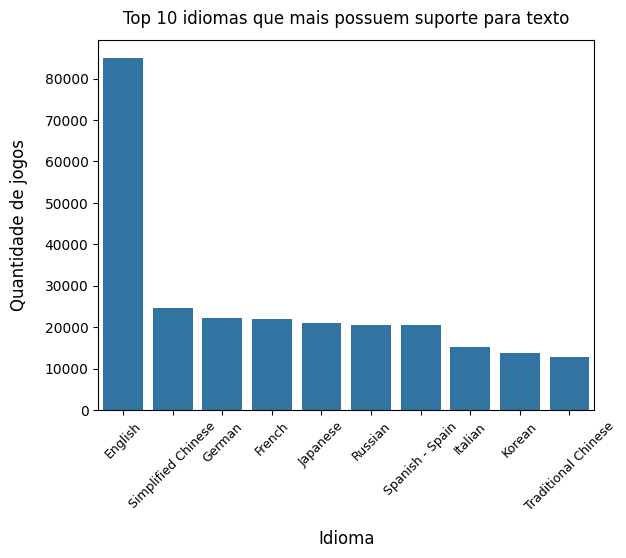

In [296]:
sns.barplot(languages_df, x='text_support', y='text_count')
plt.title('Top 10 idiomas que mais possuem suporte para texto', pad=12, size=12)
plt.xlabel('Idioma', size=12, labelpad=12)
plt.ylabel('Quantidade de jogos', size=12, labelpad=12)
plt.xticks(rotation=45, fontsize=9)
plt.show()

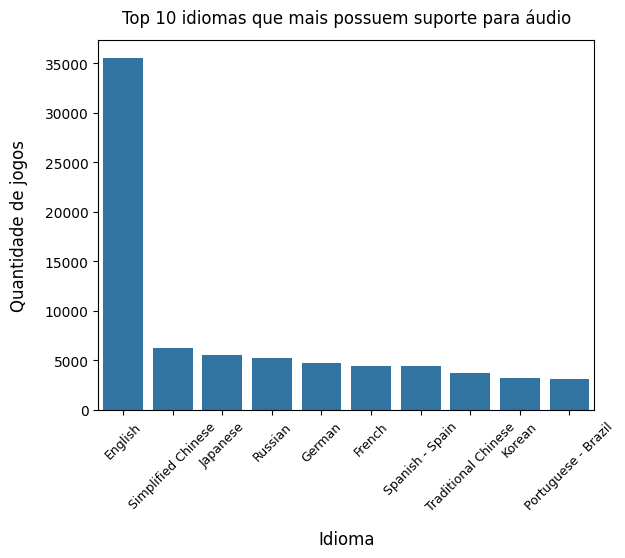

In [297]:
sns.barplot(languages_df, x='audio_support', y='audio_count')
plt.title('Top 10 idiomas que mais possuem suporte para áudio', pad=12, size=12)
plt.xlabel('Idioma', size=12, labelpad=12)
plt.ylabel('Quantidade de jogos', size=12, labelpad=12)
plt.xticks(rotation=45, fontsize=9)
plt.show()

In [298]:
df['month'] = df['release_date'].dt.month_name()

In [299]:
df['year'] = df['release_date'].dt.year

In [300]:
df.head(1)

,appid,name,release_date,required_age,price,dlc_count,header_image,windows,mac,linux,...,positive,negative,estimated_owners,discount,peak_ccu,tags,pct_pos_total,pct_pos_recent,month,year
0,730,Counter-Strike 2,2012-08-21,0,0.0,1,https://shared.akamai.steamstatic.com/store_it...,True,False,True,...,7480813,1135108,100000000 - 200000000,0,1212356,"{'FPS': 90857, 'Shooter': 65397, 'Multiplayer'...",86,82,August,2012


In [301]:
priceYearMonth_df = df.groupby(['year', 'month'])['price'].mean().round(2).reset_index()
priceYearMonth_df

,year,month,price
0,1997,June,9.99
1,1997,November,0.00
2,1999,April,4.99
3,2001,December,19.99
4,2001,March,19.99
...,...,...,...
223,2024,October,7.07
224,2024,September,8.40
225,2025,February,6.35
226,2025,January,7.23


In [303]:
fig = px.line(data_frame=priceYearMonth_df, x='month', y='price', color='year', title='Evolução dos preços')
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [ ]:
df[df['name'] == "Tom Clancy's Rainbow Six® Siege"]

,appid,name,release_date,required_age,price,dlc_count,header_image,windows,mac,linux,...,positive,negative,estimated_owners,discount,peak_ccu,tags,pct_pos_total,pct_pos_recent,month,year
8,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,3.99,9,https://shared.akamai.steamstatic.com/store_it...,True,False,False,...,1152763,218446,20000000 - 50000000,80,89916,"{'FPS': 9831, 'PvP': 9162, 'e-sports': 9072, '...",84,76,December,2015
